NameError: name 'fps' is not defined

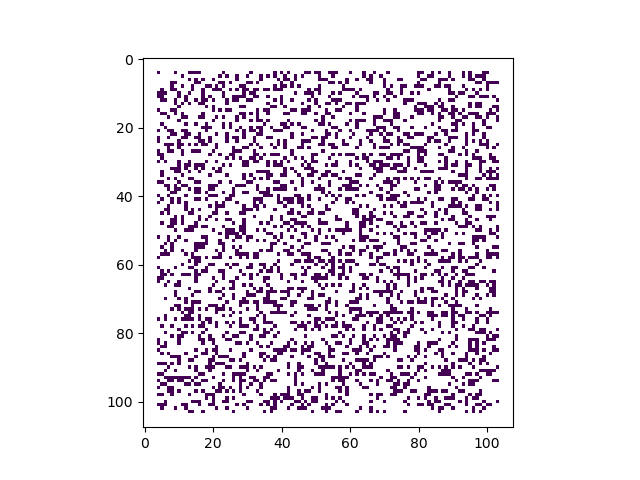

In [5]:
# Usually we use `%matplotlib inline`. However we need `notebook` for the anim to render in the notebook.
%matplotlib notebook
import matplotlib.colors as colors
from simulation import *
from viz import plot_slices_of_simulation
import matplotlib.pyplot as plt
import matplotlib.animation as animation

m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=.05
p_prop=0.1
min_seed=20
r_grow=0.8
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 900
max_ignite=0.1



params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()




forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree)

im = ax.imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))

def animate_func(i):
    global forest
    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)
    
    im.set_array(forest)
    im.set_alpha((forest > 0).astype(float))
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = t_steps,
                               interval = 200, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')



<IPython.core.display.Javascript object>


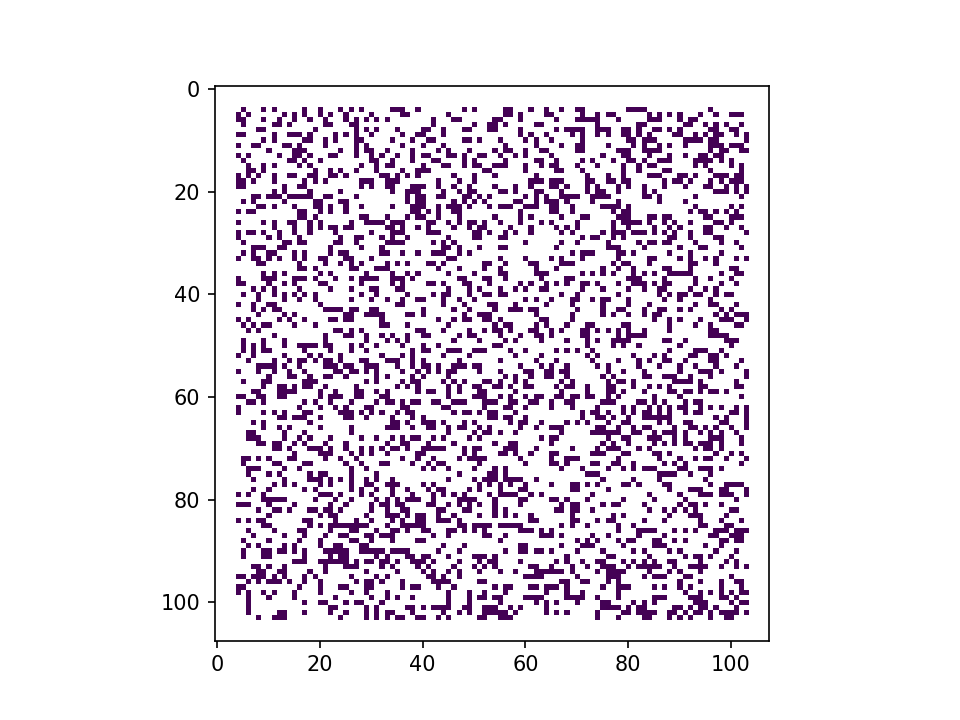

In [9]:

m = 0.5 # placeholder, not used. 
L = 100
t_steps = 500
d = 4
init_grass=0.2 
init_tree=0.1
p_disp=.05
p_prop=0.1
min_seed=20
r_grow=0.8
tree_carrying_capacity = 200
neighborhood_carrying_capacity = 900
max_ignite=0.1

forest = initialize_forest(L=L, 
                            d=d, 
                            init_grass=init_grass, 
                            init_tree=init_tree)
params_dict = initialize_params_dict(m=m, 
                                        L=L, 
                                        t_steps=t_steps, 
                                        d=d, 
                                        init_grass=init_grass, 
                                        init_tree=init_tree, 
                                        p_disp=p_disp, 
                                p_prop=p_prop,
                                min_seed=min_seed,
                                r_grow=r_grow, 
                                tree_carrying_capacity=tree_carrying_capacity,
                                neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
                                max_ignite=max_ignite)

# set up for animation
fig, ax = plt.subplots()
plt.grid(False)
imshow = ax.imshow(forest, vmin=1, vmax=tree_carrying_capacity*1.2, alpha=(forest > 0).astype(float))



# initialize some key things to save at every time point
def iterate(i): 
    forest = grow_season(forest, params_dict) 
    forest, area_burned, indices_burned = fire_season(forest, params_dict)
    return forest



# def animate(i):
#     imshow.set_data(animate.X)
#     animate.X = iterate(animate.X)
#     # Bind our grid to the identifier X in the animate function's namespace.
# animate.X = forest

#     imshow.set_data(forest)
#     imshow.set_alpha((forest > 0).astype(float))
ani = animation.FuncAnimation(fig, iterate, frames=t_steps, fargs=(params_dict,), interval=100)
plt.show()



# run_simulation_animate(m=m, 
#             L=L, 
#             t_steps=time_steps, 
#             d=d, 
#             init_grass=init_grass, 
#             init_tree=init_tree, 
#             p_disp=p_disp, 
#             p_prop=p_prop, 
#             min_seed=min_seed, 
#             r_grow=r_grow, 
#             tree_carrying_capacity=tree_carrying_capacity,
#             neighborhood_carrying_capacity=neighborhood_carrying_capacity, 
#             max_ignite=max_ignite, 
#             ANIMATE=True)

